In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data into a pandas DataFrame
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [3]:
print(df.isnull().sum())
# Fill missing values in a specific column with 0
df['Electric Range'].fillna(0, inplace=True)

VIN (1-10)                                             0
County                                                 6
City                                                   6
State                                                  0
Postal Code                                            6
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        21
Base MSRP                                             21
Legislative District                                 583
DOL Vehicle ID                                         0
Vehicle Location                                      14
Electric Utility                                       6
2020 Census Tract                                      6
dtype: int64


C:\Users\shubh\AppData\Local\Temp\ipykernel_34904\3411987471.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electric Range'].fillna(0, inplace=True)


In [4]:
# Find the top 10 most popular vehicle makes
top_10_makes = df['Make'].value_counts().head(10)
print(top_10_makes)
# Count the number of vehicles for each Model Year
model_year_counts = df['Model Year'].value_counts().sort_index()

Make
TESLA        105253
CHEVROLET     18223
NISSAN        16085
FORD          13492
KIA           12171
BMW           10551
TOYOTA        10429
HYUNDAI        8328
RIVIAN         7637
VOLVO          6570
Name: count, dtype: int64


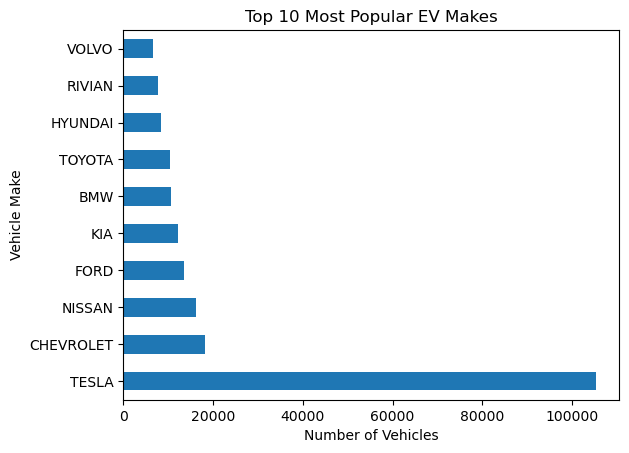

In [5]:
# Create a bar chart of the top 10 makes
top_10_makes.plot(kind='barh')
plt.title('Top 10 Most Popular EV Makes')
plt.xlabel('Number of Vehicles')
plt.ylabel('Vehicle Make')
plt.savefig('top_10_ev_makes.png')
plt.show()

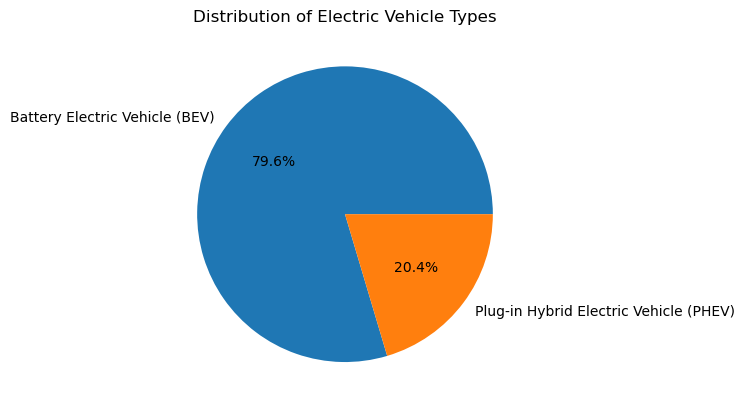

In [6]:
# Create a pie chart of EV types
vehicle_type_counts = df['Electric Vehicle Type'].value_counts()
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Electric Vehicle Types')
plt.savefig('ev_type_distribution.png')
plt.show()


Number of Vehicles by Model Year:
Model Year
2000        8
2002        2
2003        1
2008       19
2010       24
2011      637
2012     1447
2013     4140
2014     3341
2015     4592
2016     5288
2017     8757
2018    14555
2019    11024
2020    12338
2021    20713
2022    29281
2023    59273
2024    49710
2025    23319
2026     2190
Name: count, dtype: int64


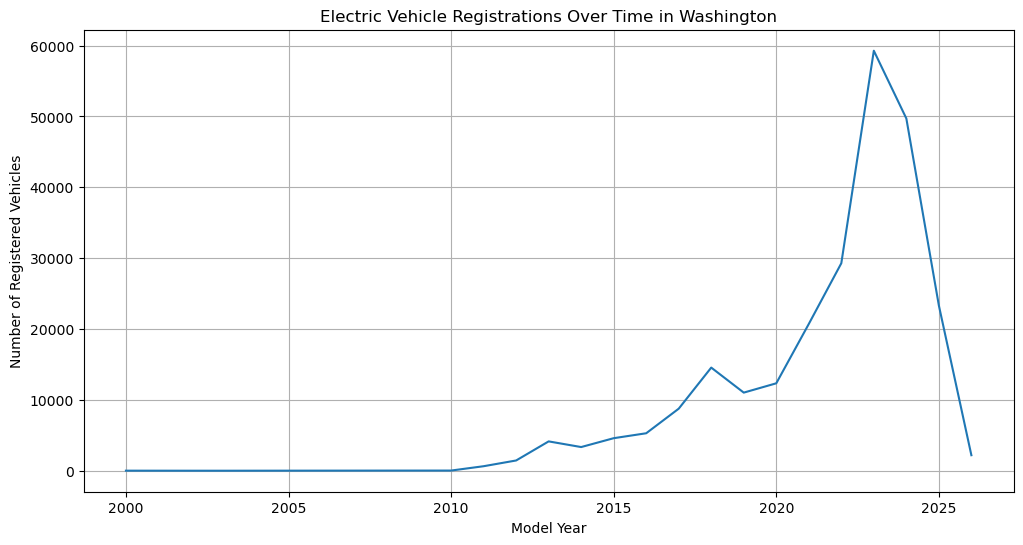

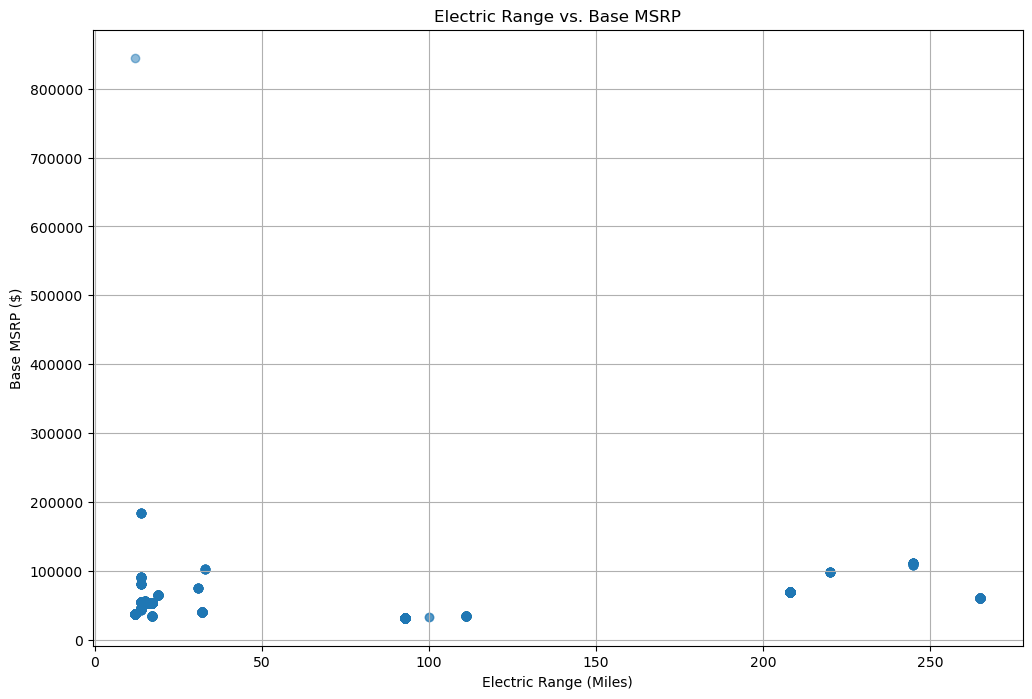

Pearson correlation between Electric Range and Base MSRP: 0.39


In [7]:
 # EDA 3: EV Registrations Over Time
# We count the number of vehicles for each model year and sort the results.
model_year_counts = df['Model Year'].value_counts().sort_index()
print("\nNumber of Vehicles by Model Year:")
print(model_year_counts)

# We create a line chart to visualize the trend over time.
plt.figure(figsize=(12, 6))
plt.plot(model_year_counts.index, model_year_counts.values)
plt.title('Electric Vehicle Registrations Over Time in Washington')
plt.xlabel('Model Year')
plt.ylabel('Number of Registered Vehicles')
plt.grid(True)
plt.show()

# Step 4: Deeper Analysis
# We filter the data to remove rows with a Base MSRP of 0.
filtered_df = df[df['Base MSRP'] > 0].copy()

# We create a scatter plot to visualize the relationship between Electric Range and Base MSRP.
plt.figure(figsize=(12, 8))
plt.scatter(filtered_df['Electric Range'], filtered_df['Base MSRP'], alpha=0.5)
plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Electric Range (Miles)')
plt.ylabel('Base MSRP ($)')
plt.grid(True)
plt.show()

# We calculate the Pearson correlation coefficient to quantify the relationship.
correlation = filtered_df['Electric Range'].corr(filtered_df['Base MSRP'])
print(f"Pearson correlation between Electric Range and Base MSRP: {correlation:.2f}")

Top 10 Counties by EV Registrations:
County
King         124211
Snohomish     31031
Pierce        20829
Clark         15279
Thurston       9175
Kitsap         8479
Spokane        7123
Whatcom        6144
Benton         3391
Skagit         2941
Name: count, dtype: int64


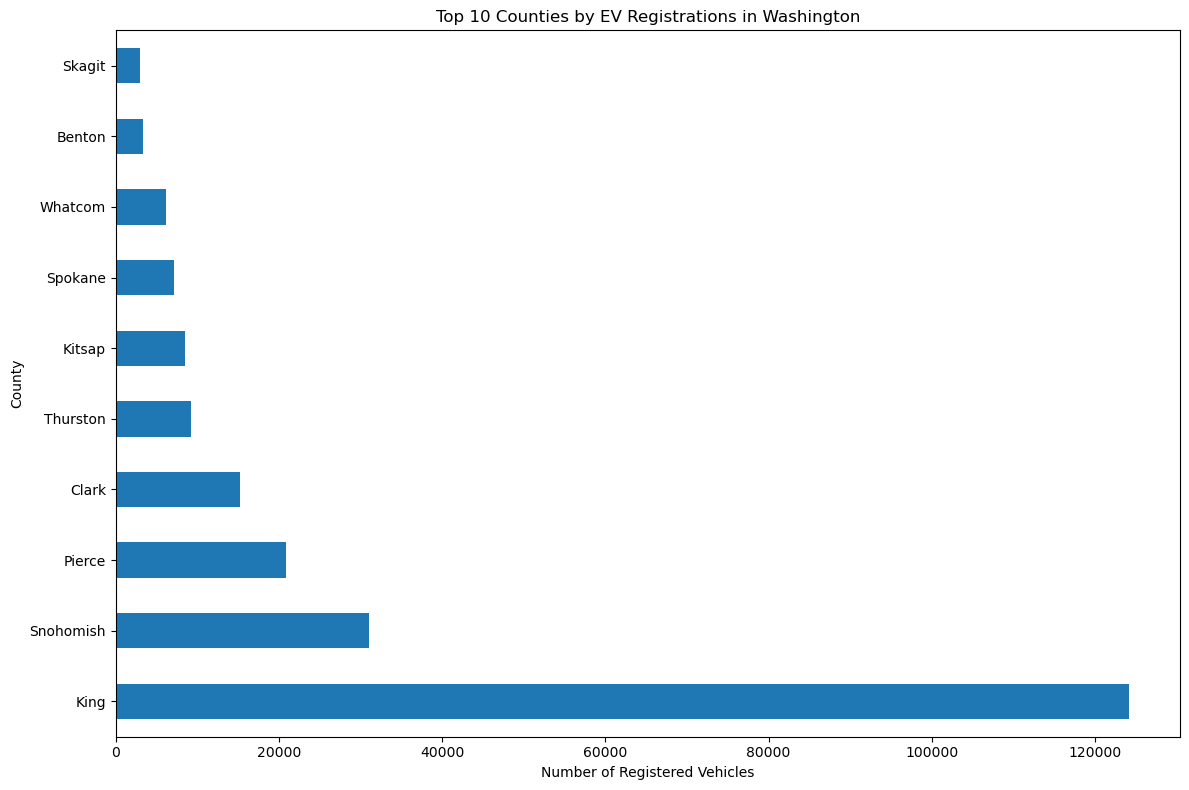

In [8]:
# We count the number of vehicles in each county and get the top 10.
# The `.value_counts()` method counts the number of occurrences of each unique county.
# The `.head(10)` method selects the 10 most frequent counties.
top_10_counties = df['County'].value_counts().head(10)
print("Top 10 Counties by EV Registrations:")
print(top_10_counties)

# We now create a bar chart to visualize the data.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# `plot(kind='barh')` creates a horizontal bar chart.
top_10_counties.plot(kind='barh')

# We add labels and a title to the chart for clarity.
plt.title('Top 10 Counties by EV Registrations in Washington')
plt.xlabel('Number of Registered Vehicles')
plt.ylabel('County')
plt.tight_layout()
plt.show()